**Correlação de Pearson:**

Medida que nos indica a intensidade e a direção da relação linear entre duas variáveis QUANTITATIVAS. Essa medida faz um elo com
a Análise Descritiva e os conceitos de Regressão Linear.

Vejamos um exemplo prático onde o coeficiente de correlação de Pearson é utilizado para criar um gráfico de dispersão:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import pearsonr

In [15]:
#dados fictícios: horas de estudo impactando nas notas
dados={'Horas de Estudo':[1,2,3,4,5,6,7,8,9,10],
       'Nota':[55,60,61,67,70,72,75,78,85,88]}
df_dados=pd.DataFrame(dados)
display(dados)

{'Horas de Estudo': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Nota': [55, 60, 61, 67, 70, 72, 75, 78, 85, 88]}

In [23]:
#calculando o coeficiente de correlação de Pearson
correlacao,_=pearsonr(df_dados['Horas de Estudo'],df_dados['Nota'])
print(correlacao)

0.9928284651674173


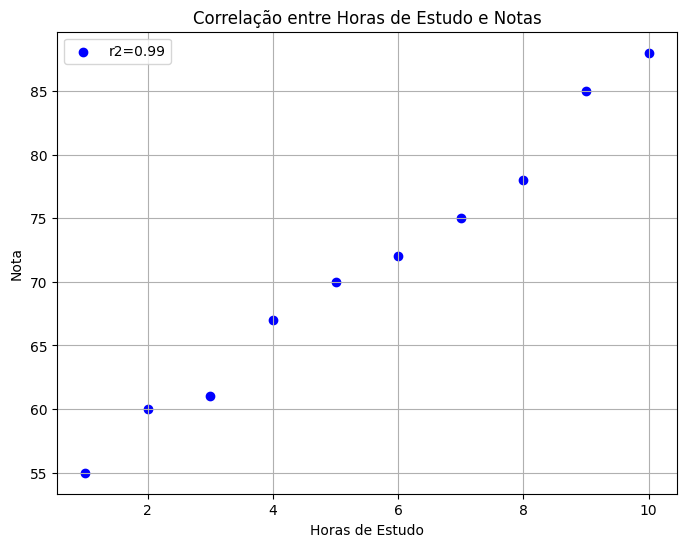

In [28]:
#criando o gráfico de dispersão
plt.figure(figsize=(8,6))
plt.scatter(df_dados['Horas de Estudo'],df_dados['Nota'],
color='blue', label=f'r2={correlacao**2:.2f}')
plt.title('Correlação entre Horas de Estudo e Notas')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver a natureza do coeficiente assumir valores no intervalo entre -1 e +1. O coeficiente mede a intensidade e a direção da relação entre os dados lineares.
Essa intensidade diz respeito ao GRAU DE RELACIONAMENTO entre duas variáveis:

1. Correlação BOA: entre 0.7 e 0.9 (seja positivo ou negativo);
2. Correlação MODERADA: entre 0.5 e 0.7 (seja positivo ou negativo);
3. Correlação FRACA: entre 0.3 e 0.5 (seja positivo ou negativo).

In [32]:
#Visualizando a Dispersão entre Variáveis utilizando uma categoria QUALITATIVA:

#Adição da variável qualitativa:
df_dados['Motivação']=['Baixa','Baixa','Média','Média','Alta','Alta','Alta','Média','Média','Alta']

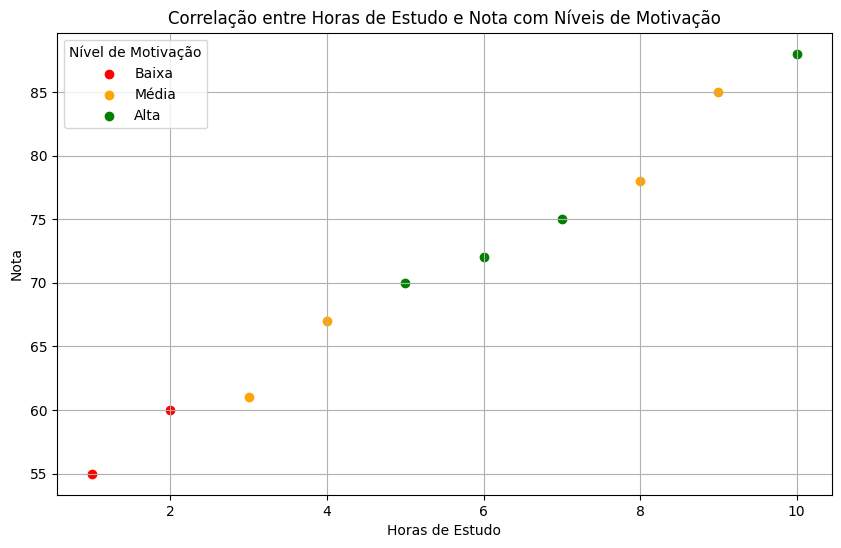

In [34]:
#Novo Gráfico de Dispersão (cores diferentes por categoria):

plt.figure(figsize=(10, 6))
colors = {'Baixa': 'red', 'Média': 'orange', 'Alta': 'green'} # cores diferentes para cada nível de motivação

for motivacao in df_dados['Motivação'].unique():
    subset = df_dados[df_dados['Motivação'] == motivacao]
    plt.scatter(subset['Horas de Estudo'], subset['Nota'], label=motivacao, color=colors[motivacao])

plt.title('Correlação entre Horas de Estudo e Nota com Níveis de Motivação')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota')
plt.legend(title='Nível de Motivação')
plt.grid(True)
plt.show()

**Inserção de Gráficos e Estatísticas em Painel Simples:**

Média das Horas de Estudo: 5.5
Média das Notas: 71.1
Desvio Padrão das Horas de Estudo: 3.0276503540974917
Desvio Padrão das Notas: 10.774970997640782


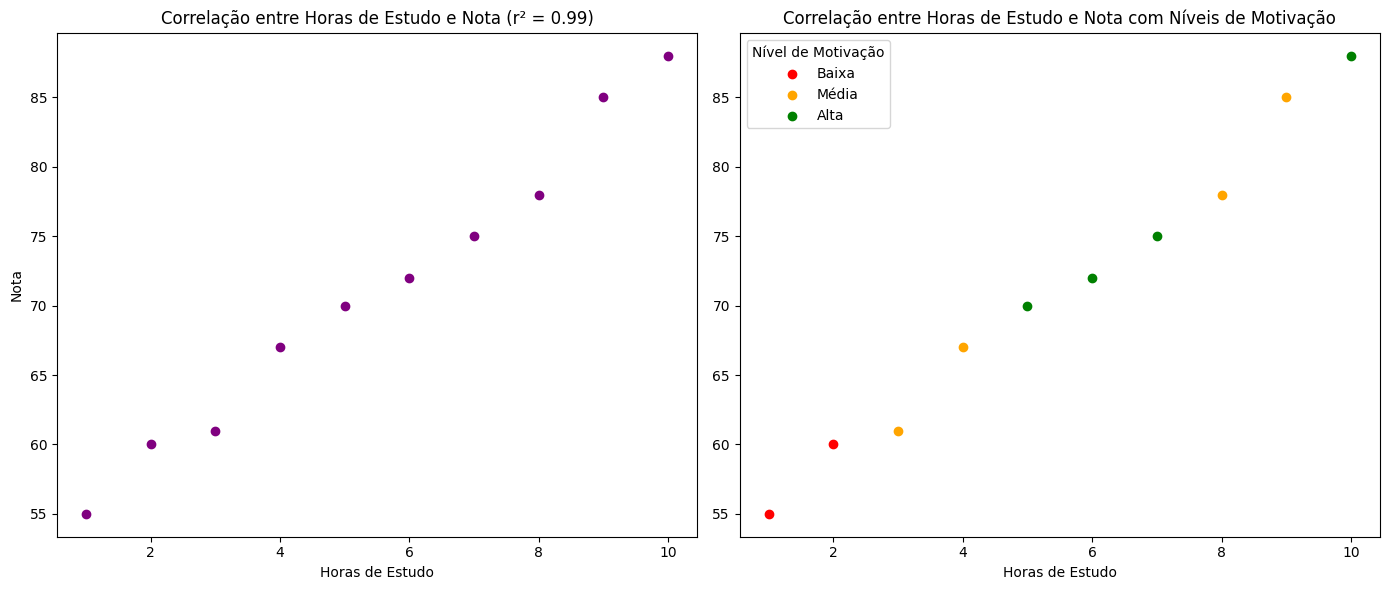

In [36]:
# Estatísticas básicas
media_horas = df_dados['Horas de Estudo'].mean()
media_notas = df_dados['Nota'].mean()
desvio_padrao_horas = df_dados['Horas de Estudo'].std()
desvio_padrao_notas = df_dados['Nota'].std()

print(f"Média das Horas de Estudo: {media_horas}")
print(f"Média das Notas: {media_notas}")
print(f"Desvio Padrão das Horas de Estudo: {desvio_padrao_horas}")
print(f"Desvio Padrão das Notas: {desvio_padrao_notas}")

# Painel com gráficos de dispersão
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Dispersão com Legenda de r²
axes[0].scatter(df_dados['Horas de Estudo'], df_dados['Nota'], color='purple')
axes[0].set_title(f'Correlação entre Horas de Estudo e Nota (r² = {correlacao**2:.2f})')
axes[0].set_xlabel('Horas de Estudo')
axes[0].set_ylabel('Nota')

# Gráfico com Cores por Nível de Motivação
for motivacao in df_dados['Motivação'].unique():
    subset = df_dados[df_dados['Motivação'] == motivacao]
    axes[1].scatter(subset['Horas de Estudo'], subset['Nota'], label=motivacao, color=colors[motivacao])
axes[1].set_title('Correlação entre Horas de Estudo e Nota com Níveis de Motivação')
axes[1].set_xlabel('Horas de Estudo')
axes[1].legend(title='Nível de Motivação')

plt.tight_layout()
plt.show()

#### Exemplo com um Arquivo PARQUET:

In [9]:
import polars as pl

# Carregar dados em modo Lazy (para otimização)
dados_lazy = pl.scan_parquet('202501_NovoBolsaFamilia_polars.parquet')

# Converter "VALOR PARCELA" para float (tratando vírgulas como decimais)
dados_convertidos = (
    dados_lazy
    .with_columns(
        pl.col("VALOR PARCELA")
        .str.replace(",", ".")
        .cast(pl.Float64, strict=False)  # Converte valores válidos, mantém null para inválidos
        .alias("VALOR_PARCELA_FLOAT")
    )
    .filter(pl.col("VALOR_PARCELA_FLOAT").is_not_null())  # Remove valores não numéricos
)

In [ ]:
# Exemplo de correlação entre "VALOR PARCELA" e "NIS FAVORECIDO" (em qualquer município):
correlacao_geral = (
    dados_convertidos
    .select(
        pl.corr("VALOR_PARCELA_FLOAT", "NIS FAVORECIDO").alias("CORRELACAO_PEARSON")
    )
    .collect()
)

print("Correlação geral entre valor da parcela e quantidade de beneficiários:")
display(correlacao_geral)

Correlação geral entre valor da parcela e quantidade de beneficiários:


CORRELACAO_PEARSON
f64
0.116974


In [13]:
# Filtrando para um município (ex: Rio de Janeiro) e calculando uma nova correlação:
correlacao_rj = (
    dados_convertidos
    .filter(pl.col("NOME MUNICÍPIO") == "RIO DE JANEIRO")
    .select(
        pl.corr("VALOR_PARCELA_FLOAT", "NIS FAVORECIDO").alias("CORRELACAO_RJ")
    )
    .collect()
)

print("Correlação no Rio de Janeiro:")
display(correlacao_rj)

Correlação no Rio de Janeiro:


CORRELACAO_RJ
f64
0.157094


### Interpretação dos Resultados:

> Correlação próxima de +1: Relação linear positiva (ex.: valor da parcela ↑ → quantidade de beneficiários ↑).

> Correlação próxima de -1: Relação inversa (ex.: valor da parcela ↑ → quantidade de beneficiários ↓).

> Correlação ~0: Sem relação linear aparente.

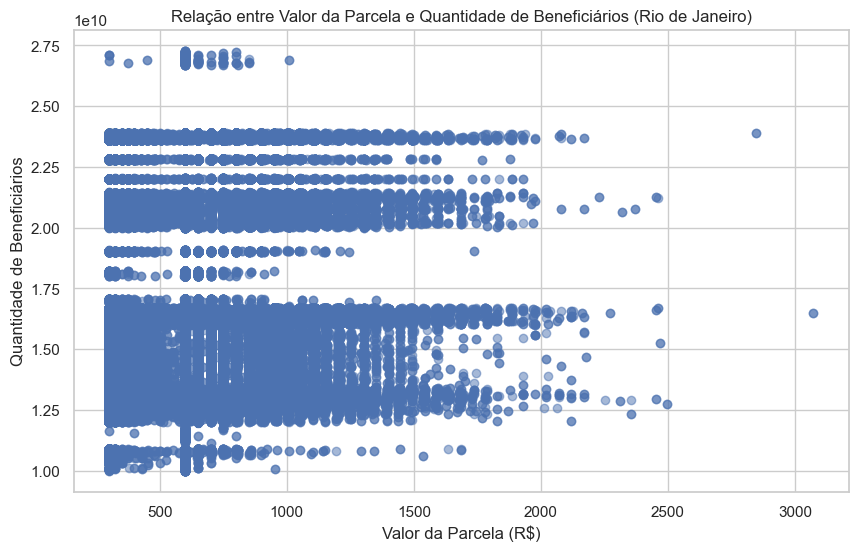

In [6]:
# Exemplo de visualização (MATPLOTLIB):

import polars as pl
import matplotlib.pyplot as plt

# Carregar e preparar os dados
dados = (
    pl.scan_parquet('202501_NovoBolsaFamilia_polars.parquet')
    .filter(pl.col("NOME MUNICÍPIO") == "RIO DE JANEIRO")
    .with_columns(
        pl.col("VALOR PARCELA").str.replace(",", ".").cast(pl.Float64).alias("VALOR_FLOAT")
    )
    .filter(pl.col("VALOR_FLOAT").is_not_null())
    .collect()
)

# Extrair colunas para visualização
valores = dados.get_column("VALOR_FLOAT").to_list()
qtd_beneficiarios = dados.get_column("NIS FAVORECIDO").to_list()

# Criar gráfico
plt.figure(figsize=(10, 6))
plt.scatter(valores, qtd_beneficiarios, alpha=0.5)
plt.title("Relação entre Valor da Parcela e Quantidade de Beneficiários (Rio de Janeiro)")
plt.xlabel("Valor da Parcela (R$)")
plt.ylabel("Quantidade de Beneficiários")
plt.grid(True)
plt.show()

In [1]:
!pip install seaborn

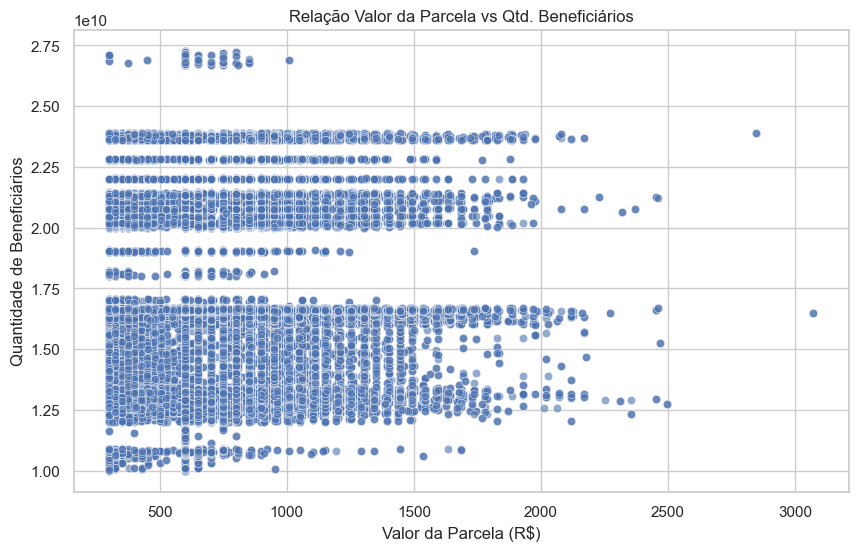

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar dados (usando o mesmo DataFrame criado acima)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Usar .to_numpy() para evitar conversão para Pandas
sns.scatterplot(
    x=dados.get_column("VALOR_FLOAT").to_numpy(),
    y=dados.get_column("NIS FAVORECIDO").to_numpy(),
    alpha=0.6
)

plt.title("Relação Valor da Parcela vs Qtd. Beneficiários")
plt.xlabel("Valor da Parcela (R$)")
plt.ylabel("Quantidade de Beneficiários")
plt.show()